In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster._kmeans import _kmeans_single_lloyd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
n_clusters = 10
data, y, centers = make_blobs(
    n_samples=10000, 
    n_features=32, 
    centers=n_clusters, 
    cluster_std=0.5, 
    shuffle=True,
    random_state=42,
    return_centers=True
)

In [3]:
kwargs = {
    "n_clusters": n_clusters,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    "tol": 1e-4,
    "verbose": False,
    "algorithm": "full"  # "full" = "lloyd"
}

In [4]:
kmeans = KMeans(**kwargs)

### fit

In [5]:
%timeit kmeans.fit(data)

1.01 s ± 30 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
kmeans.init = 'random'
%timeit kmeans.fit(data)

79.3 ms ± 9.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### one iter

In [7]:
import time

n_samples = data.shape[0]
random_state = np.random.RandomState(228)
kmeans_single = _kmeans_single_lloyd
x_squared_norms = (data ** 2).sum(1)
sample_weight = np.ones(n_samples, dtype=data.dtype)

def fit(init):
    t0 = time.time()
    centers_init = kmeans._init_centroids(
        data, 
        x_squared_norms=x_squared_norms, 
        init=init,
        random_state=random_state
    )
    t_init = time.time() - t0
    
    # не зависит от init
    t0 = time.time()
    labels, inertia, centers, n_iter_ = kmeans_single(
        data, 
        sample_weight, 
        centers_init, 
        max_iter=kmeans.max_iter, 
        verbose=False, 
        tol=kmeans._tol, 
        x_squared_norms=x_squared_norms, 
        n_threads=kmeans._n_threads
    )
    t_fit = time.time() - t0
    return t_init, t_fit

In [8]:
%timeit fit("random")

9.41 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
%timeit fit("k-means++")

99 ms ± 2.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
res_random = []
for _ in range(10):
    res_random.append(step("random"))
res_pp = []
for _ in range(10):
    res_pp.append(step("k-means++"))

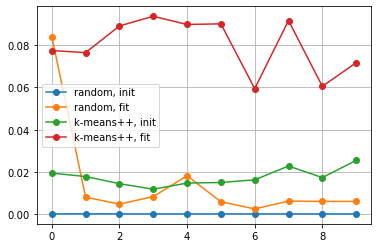

In [11]:
plt.plot([x[0] for x in res_random], marker='o', label='random, init')
plt.plot([x[1] for x in res_random], marker='o', label='random, fit')
plt.plot([x[0] for x in res_pp], marker='o', label='k-means++, init')
plt.plot([x[1] for x in res_pp], marker='o', label='k-means++, fit')
plt.legend()
plt.grid();

### fit with verbose

In [12]:
kmeans.verbose = True
kmeans.n_init = 3

In [13]:
kmeans.init = "random"
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 3513325.8952152096.
Iteration 1, inertia 1733928.0047971657.
Iteration 2, inertia 1733877.227358605.
Iteration 3, inertia 1733837.4816399855.
Iteration 4, inertia 1733814.1094886095.
Iteration 5, inertia 1733803.454971078.
Iteration 6, inertia 1733797.0551785817.
Iteration 7, inertia 1733793.5867823071.
Iteration 8, inertia 1733791.2995407109.
Converged at iteration 8: center shift 0.0013803280109366118 within tolerance 0.0030676854895045984.
Initialization complete
Iteration 0, inertia 6577846.093709042.
Iteration 1, inertia 3220591.18085338.
Iteration 2, inertia 2665440.469143823.
Iteration 3, inertia 2665403.6379226795.
Iteration 4, inertia 2665380.310122384.
Iteration 5, inertia 2665364.787033867.
Iteration 6, inertia 2665354.949187525.
Iteration 7, inertia 2665347.9961849838.
Iteration 8, inertia 2665345.0757108484.
Iteration 9, inertia 2665342.493681225.
Iteration 10, inertia 2665340.660373859.
Converged at iteration 10: center shift 0

KMeans(algorithm='full', init='random', n_clusters=10, n_init=3,
       random_state=42, verbose=True)

In [14]:
kmeans.init = "k-means++"
kmeans.fit(data)

Initialization complete
Iteration 0, inertia 154368.93169434695.
Iteration 1, inertia 79901.86219920107.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 158932.53147092968.
Iteration 1, inertia 79901.86219920106.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 150585.9459302801.
Iteration 1, inertia 79901.86219920106.
Converged at iteration 1: strict convergence.


KMeans(algorithm='full', n_clusters=10, n_init=3, random_state=42, verbose=True)